In [76]:
import requests
def connected_to_internet(url='http://www.google.com/', timeout=50):
    try:
        _ = requests.get(url, timeout=timeout)
        return True
    except requests.ConnectionError:
        print("No internet connection available.")
    return False

connected_to_internet()

True

In [ ]:
#!pip install -r requirements.txt

In [77]:
import os
import threading
import time
import importlib
import sys
import warnings
mpath = os.getcwd() + '/lib'
sys.path.append(mpath)

In [78]:
import ipywidgets as widgets
from ipywidgets import *
from IPython.display import *
import fxcmpyi
import pandas
import matplotlib
from matplotlib import *

import SharedObjects
import pairs
import Copula
importlib.reload(Copula)
importlib.reload(SharedObjects)
importlib.reload(fxcmpyi)
importlib.reload(pairs)

import numpy

In [ ]:
#fxcmpy.__version__

minutes: m1, m5, m15 and m30,
hours: H1, H2, H3, H4, H6 and H8,
one day: D1,
one week: W1,
one month: M1.

In [79]:
#Set variables
T = 'm1' #Period
sz = 1000; #Size
prs = dict()
pr_mlreg = dict()
mlr = pandas.DataFrame()

Get access token from https://tradingstation.fxcm.com.

demo - for account type demo

real - for account type real

In [80]:
con = None
def custom():
    global con
    try:
        def login():
            global con
            TOKEN = '2720337434ea557dea25bad4cd9ad392d70f620d'
            con = fxcmpyi.fxcmpy(access_token=TOKEN, log_level='error', server='demo')
            return
        threading.Thread(target=login).start()
    except:
        custom()
custom()
#con.close()

In [86]:
if con is not None:
    shd_obj = SharedObjects.SharedObjects(con)
    print(con.is_connected())

True


In [87]:
#Function to update data
def price_update(data = None, dataframe = None):
    symbol = data['Symbol']
    global pr_mlreg, mlr, shd_obj, prs
    if (symbol in prs):
        #pr_mlreg[symbol] = prs.get(symbol).multiple_linear_regression(prs)
        #mlr = shd_obj.mergeall_byrow(pr_mlreg)
        prs.get(symbol).standardize_prices()
        resp = prs.get(symbol).co_integration(prs, shd_obj.coint_mat, shd_obj.spreads)
        shd_obj.update(prs, resp[0], resp[1])

In [88]:
def stream():
    for symbol in shd_obj.tradable_pairs:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            shd_obj.stream_data(symbol, (price_update, prs.get(symbol).on_price_update) )

In [89]:
def get_past_prices():
    for symbol in shd_obj.tradable_pairs:
        dtf = shd_obj.historical_data(symbol, T, sz)
        if symbol not in prs:
            prs[symbol] = pairs.Pair(symbol, dtf)
            prs.get(symbol).standardize_prices()
            resp = prs.get(symbol).co_integration(prs, shd_obj.coint_mat, shd_obj.spreads)
            shd_obj.update(prs, resp[0], resp[1])
            
        syz = len(prs.get(symbol).standardized_prices)
        strm = False
        for sym in shd_obj.tradable_pairs:
            if(hasattr(prs.get(sym), 'standardized_prices') and syz == len(prs.get(sym).standardized_prices)):
                strm = True
            else:
                strm = False
        if(strm == True):
            threading.Thread(target=stream).start()
                
threading.Thread(target=get_past_prices).start()

#Stream Tradable Pairs

In [ ]:
#shd_obj.unstream_data()

In [ ]:
#con.close()

In [ ]:
#status = shd_obj.get_status()
#if(status == 'You are logged in'):
    #shd_obj.stream_data(T, sz, price_update)

In [ ]:
##Reverses the dataframe rows
#df[::-1]

#con.is_subscribed(instruments[0])
#con.get_subscribed_symbols()

#con.unsubscribe_market_data('EUR/USD')
#print(shd_obj.pairs)
#con.close()

In [ ]:
#con.get_default_account()
#con.get_prices('EUR/USD')

In [96]:
#import inspect
#source_file_DF = inspect.getsource(pandas.DataFrame().join)
#print(source_file_DF)

In [98]:
#mlr
#shd_obj.corr_bd
#shd_obj.coint_mat

In [94]:
plot0 = None
plot1 = None
def doplot():
    y = 'USD/CHF'
    x = 'NZD/USD'
    plot0 = shd_obj.pairwise_spreadplot(y, x)
    plot1 = shd_obj.pairwise_plot(y, x)
threading.Thread(target=doplot).start()

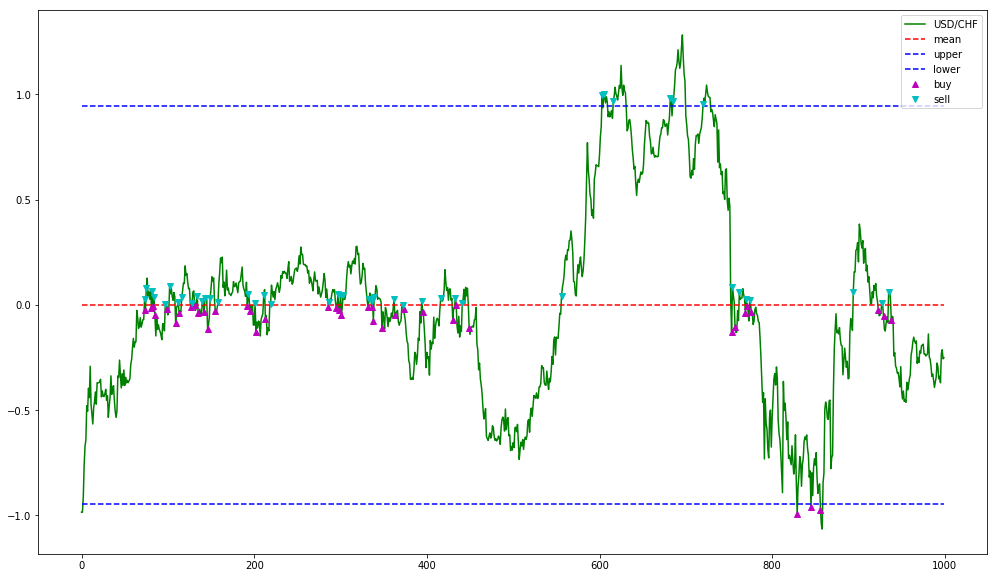

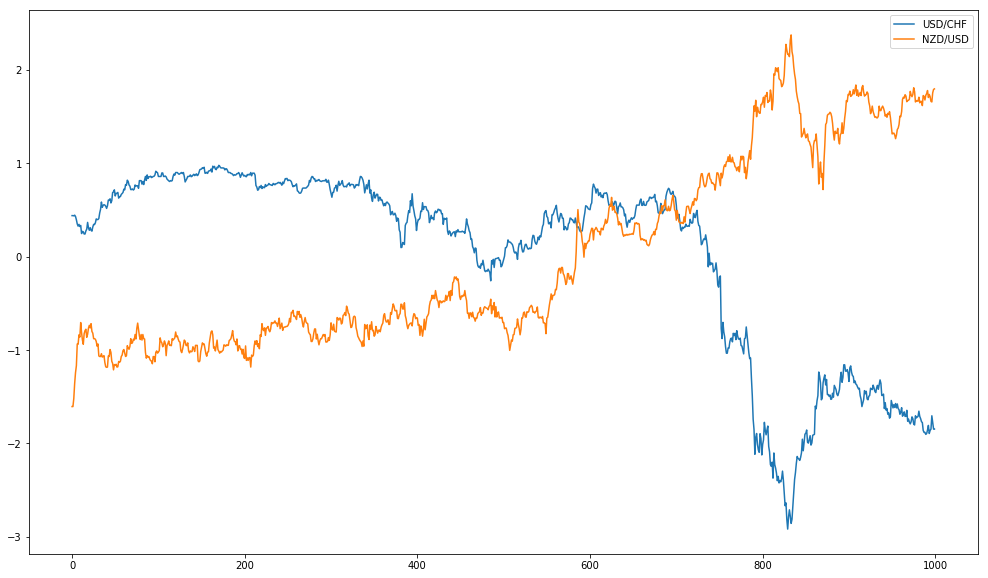

In [95]:
#Plots

In [93]:
shd_obj.corr_mat

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,AUD/USD,USD/CAD,NZD/USD,EUR/GBP,USD/ZAR,ZAR/JPY
EUR/USD,0.000000,-0.484231,0.660876,-0.543336,0.219725,-0.286780,0.399823,0.418394,-0.552403,0.034864
USD/JPY,-0.484231,0.000000,-0.377153,0.402132,-0.287168,0.186682,-0.383176,-0.461057,0.326705,0.254407
GBP/USD,0.660876,-0.377153,0.000000,-0.464865,0.261356,-0.259313,0.345144,0.090711,-0.409284,-0.011691
USD/CHF,-0.543336,0.402132,-0.464865,0.000000,-0.503113,-0.017039,-0.618608,-0.355144,0.243928,0.268657
AUD/USD,0.219725,-0.287168,0.261356,-0.503113,0.000000,-0.128570,0.648166,0.270438,-0.133527,-0.308262
USD/CAD,-0.286780,0.186682,-0.259313,-0.017039,-0.128570,0.000000,-0.098533,-0.261427,0.490496,-0.225206
NZD/USD,0.399823,-0.383176,0.345144,-0.618608,0.648166,-0.098533,0.000000,0.376004,-0.166212,-0.325880
EUR/GBP,0.418394,-0.461057,0.090711,-0.355144,0.270438,-0.261427,0.376004,0.000000,-0.388040,-0.088939
USD/ZAR,-0.552403,0.326705,-0.409284,0.243928,-0.133527,0.490496,-0.166212,-0.388040,0.000000,-0.330988
ZAR/JPY,0.034864,0.254407,-0.011691,0.268657,-0.308262,-0.225206,-0.325880,-0.088939,-0.330988,0.000000


In [18]:
#shd_obj.start = True
#shd_obj.start
stream()

In [11]:
#pr = shd_obj.ipairs[4]
#dat = pandas.DataFrame()
#dat[pr[0]] = shd_obj.dataset0[pr[0]]
#dat[pr[1]] = shd_obj.dataset0[pr[1]]
#cop = Copula.copula(prs, pr, dat)
from ipywidgets import interact, interactive, fixed, interact_manual
y = interactive(shd_obj.pairwise_plot, a = shd_obj.tradable_pairs, b = shd_obj.tradable_pairs)
display(y)

interactive(children=(Dropdown(description='a', options=('EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'AUD/USD'…

In [17]:
#import inspect
#source_file_DF = inspect.getsource(pandas.DataFrame)
#print(source_file_DF)

In [ ]:
#!pip install qgrid

In [14]:
#items = ['All']+sorted(df['Asset Type Description'].unique().tolist())
from ipywidgets import interact, interactive, fixed, interact_manual
def view():
    display(shd_obj.coint_mat)
    display(shd_obj.corr_mat)
    return()
x = interactive(view)
x

interactive(children=(Output(),), _dom_classes=('widget-interact',))